In [1]:
#clone repository
!git clone https://github.com/jaimesabalimperial/jaisalab.git
%cd jaisalab/ 

Cloning into 'jaisalab'...
remote: Enumerating objects: 1068, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 1068 (delta 142), reused 148 (delta 73), pack-reused 835
Receiving objects: 100% (1068/1068), 1.03 MiB | 3.76 MiB/s, done.
Resolving deltas: 100% (661/661), done.
/notebooks/jaisalab


In [3]:
# Install pip packages in the current Jupyter kernel
import sys
!{sys.executable} -m pip install -r env/requirements.txt

  Cloning https://github.com/neocxi/prettytensor.git (to revision 564941199cdef8a9c8a570de51e04ce860714ed1) to /tmp/pip-install-7pn1aw2m/prettytensor_af31a5273afa4f4f8bd1be3b14a8c1b2
  Running command git clone --filter=blob:none --quiet https://github.com/neocxi/prettytensor.git /tmp/pip-install-7pn1aw2m/prettytensor_af31a5273afa4f4f8bd1be3b14a8c1b2
  Running command git rev-parse -q --verify 'sha^564941199cdef8a9c8a570de51e04ce860714ed1'
  Running command git fetch -q https://github.com/neocxi/prettytensor.git 564941199cdef8a9c8a570de51e04ce860714ed1
  Resolved https://github.com/neocxi/prettytensor.git to commit 564941199cdef8a9c8a570de51e04ce860714ed1
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/rlworkgroup/garage.git to /tmp/pip-req-build-qcn8hgxq
  Running command git clone --filter=blob:none --quiet https://github.com/rlworkgroup/garage.git /tmp/pip-req-build-qcn8hgxq
  Resolved https://github.com/rlworkgroup/garage.git to commit 3492f446633a7e748f2f7907

In [1]:
#import experiments
from torch import seed
from jaisalab.experiments.backlog import (trpo_backlog, cpo_backlog, 
                                          saute_trpo_backlog, dcpo_backlog)
from jaisalab.evaluation.plotter import RLPlotter
from jaisalab.utils.misc import zip_directory

In [ ]:
#
def test_seed(value):
    trpo_backlog(seed=value)
    cpo_backlog(seed=value)
    saute_trpo_backlog(seed=value)
    dcpo_backlog(seed=value)

In [2]:
def plot_experiment():
    fdir = ['trpo_backlog', 'cpo_backlog', 'saute_trpo_backlog', 'dcpo_backlog']
    data_dir = 'data2/local/experiment/'
    plotter = RLPlotter(fdir=fdir, data_dir=data_dir, savefig=True)
    plotter.plot_returns()
    #plotter.plot_constraint_vals()
    plotter.plot_costs()
    #plotter.plot_gaussian_progression(num_points=400)
    #plotter.plot_final_distribution()
    #plotter.plot_quantiles_progression(interval=10)

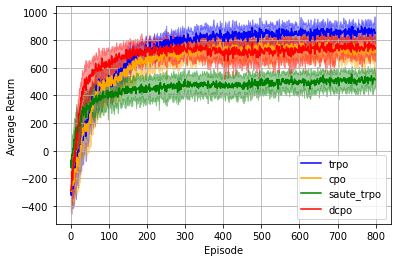

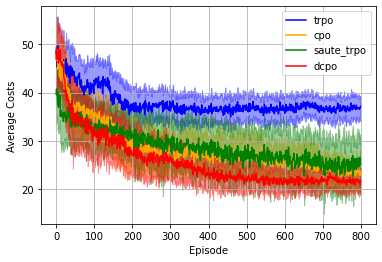

In [3]:
plot_experiment()

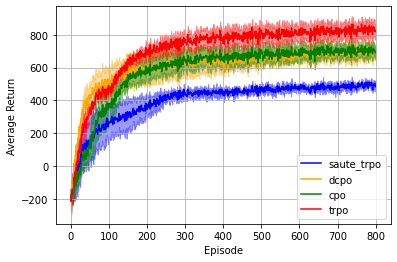

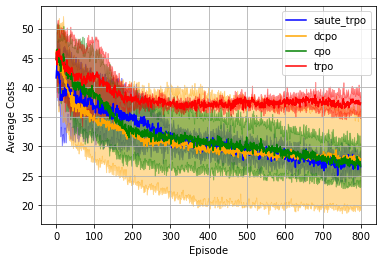

In [2]:
data_dirs = ['data1/local/experiment/', 
             'data2/local/experiment/', 
             'data3/local/experiment/']
             
plotter = RLPlotter(data_dir=data_dirs)
plotter.plot_returns()
#plotter.plot_constraint_vals()
plotter.plot_costs()
